<h1>Data Load</h1>

In [104]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing   import StandardScaler
from sklearn.neighbors       import KNeighborsClassifier

TEST_SIZE   = 0.25
SEED        = 222

scores_df   = pd.DataFrame(columns = ["Model Name", "Train Score", "Test Score", "AUC"])
original_df = pd.read_excel("Apprentice_Chef_Dataset.xlsx")

<h1>Function</h1>

In [240]:
def save_scores(model_name = None, train_score = None, test_score = None, auc = None):
    """
    save_scores(model_name = None, train_score = None, test_score = None, auc = None)
    """
    global scores_df
    
    score_data = {
        "Model Name" : model_name,
        "Train Score": train_score,
        "Test Score" : test_score,
        "AUC"        : auc
    }
    
    scores_df = scores_df.append(score_data, ignore_index = True)
    
    scores_df.to_excel("Scoring.xlsx")

##############################################################################

def retrieve_results(X_train = None, X_test = None, y_train = None, y_test = None, model = None, tree = False):
    """
    retrieve_results(X_train = None, X_testn = None, y_trainn = None, y_testn = None, model = None)
    """
    model.fit(X_train, y_train)
    
    if (tree):
        plot_feature_importances(model  = model,
                                 train  = X_train,
                                 export = False)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    # Compute predicted probabilities: y_pred_prob
    pred_y = model.predict(X_test)

    #Train Score
    train_score = model.score(X_train, y_train).round(3)
    
    #Test Score
    test_score  = model.score(X_test, y_test).round(3)    
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test, pred_y))
    
    print("\nClassification Report")
    print(classification_report(y_test, pred_y))
    
    #AUC Score
    auc         = roc_auc_score(y_true  = y_test,
                                y_score = pred_y).round(3)
    
    # Compute and print AUC score
    print(f"Traning score: {train_score}")
    print(f"Test score   : {test_score}")
    print(f"AUC          : {auc}")
    
    return train_score, test_score, auc

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

<h1>Feature Engineering</h1>

In [241]:
#for col in original_df.columns:
#    print(f"CROSS_SELL_SUCCESS = 1 and {col}")
#    print(original_df[original_df["CROSS_SELL_SUCCESS"] == 1][col].value_counts().sort_values(ascending=False))
#    print("")
#    print(f"CROSS_SELL_SUCCESS = 0 and {col}")
#    print(original_df[original_df["CROSS_SELL_SUCCESS"] == 0][col].value_counts().sort_values(ascending=False))
#    print("")
#    print("#"*50)
#    print("")

In [290]:
email_type = {
    "professional" : [
        '@mmm.com',                 '@amex.com',                '@apple.com',
        '@boeing.com',              '@caterpillar.com',         '@chevron.com',
        '@cisco.com',               '@cocacola.com',            '@disney.com',
        '@dupont.com',              '@exxon.com',               '@ge.org',
        '@goldmansacs.com',         '@homedepot.com',           '@ibm.com',
        '@intel.com',               '@jnj.com',                 '@jpmorgan.com',
        '@mcdonalds.com',           '@merck.com',               '@microsoft.com',
        '@nike.com',                '@pfizer.com',              '@pg.com',
        '@travelers.com',           '@unitedtech.com',          '@unitedhealth.com'
        '@verizon.com',             '@visa.com',                '@walmart.com'
    ],
    "personal" : [
        '@gmail.com',               '@yahoo.com',               '@protonmail.com'
    ],
    "junk" : [
        '@me.com',                  '@aol.com',                 '@hotmail.com',
        '@live.com',                '@msn.com',                 '@passport.com'
    ]
}


def Is_Valid_Email(data):
    result = 1
    data = "@" + data.split("@")[1]
    for key in email_type.keys():
        if data in email_type[key]:
            if (key == 'junk'):
                result = 0
            break
    return result


original_df['IS_VALID_EMAIL'] = original_df["EMAIL"].apply(Is_Valid_Email)


out_AVG_CLICKS_PER_VISIT = 8
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition = original_df.loc[:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > out_AVG_CLICKS_PER_VISIT]
original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


out_AVG_PREP_VID_TIME = 400
original_df['out_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > out_AVG_PREP_VID_TIME]
original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


out_AVG_TIME_PER_SITE_VISIT = 750
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > out_AVG_TIME_PER_SITE_VISIT]
original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


out_CANCELLATIONS_BEFORE_NOON = 8
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > out_CANCELLATIONS_BEFORE_NOON]
original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


out_CONTACTS_W_CUSTOMER_SERVICE = 12.50
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > out_CONTACTS_W_CUSTOMER_SERVICE]
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


out_LARGEST_ORDER_SIZE = 0
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition = original_df.loc[:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] == out_LARGEST_ORDER_SIZE]
original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


out_LATE_DELIVERIES = 17.50
original_df['out_LATE_DELIVERIES'] = 0
condition = original_df.loc[:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > out_LATE_DELIVERIES]
original_df['out_LATE_DELIVERIES'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


out_TOTAL_PHOTOS_VIEWED = 1300
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > out_TOTAL_PHOTOS_VIEWED]
original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


change_AVG_PREP_VID_TIME = 275
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > change_AVG_PREP_VID_TIME]
original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


change_AVG_TIME_PER_SITE_VISIT = 200
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > change_AVG_TIME_PER_SITE_VISIT]
original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)




#WORKED!!!
change_FOLLOWED_RECOMMENDATIONS_PCT_low = 5
change_FOLLOWED_RECOMMENDATIONS_PCT_hi  = 35
original_df['change_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition = original_df.loc[:,'change_FOLLOWED_RECOMMENDATIONS_PCT'][np.logical_and(original_df['FOLLOWED_RECOMMENDATIONS_PCT'] >= change_FOLLOWED_RECOMMENDATIONS_PCT_low, original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < change_FOLLOWED_RECOMMENDATIONS_PCT_hi)]
original_df['change_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


#DIDN'T HAVE ANY EFFECT ON AUC, it reduced the difference between Train and test
change_CANCELLATIONS_BEFORE_NOON = 2
original_df['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[:,'change_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] < change_CANCELLATIONS_BEFORE_NOON]
original_df['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)
#SMALL IMRPOVEMENT ON AUC
change_AVG_PREP_VID_TIME = 253
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] < change_AVG_PREP_VID_TIME]
original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

#SMALL IMRPOVEMENT ON AUC
change_TOTAL_PHOTOS_VIEWED_low = 78
change_TOTAL_PHOTOS_VIEWED_hi  = 643
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[:,'change_TOTAL_PHOTOS_VIEWED'][np.logical_and(original_df['TOTAL_PHOTOS_VIEWED'] >= change_TOTAL_PHOTOS_VIEWED_low, original_df['TOTAL_PHOTOS_VIEWED'] < change_TOTAL_PHOTOS_VIEWED_hi)]
original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

#DIDN'T HAVE ANY EFFECT ON AUC, it reduced the difference between Train and test
change_LARGEST_ORDER_SIZE = 3
original_df['change_LARGEST_ORDER_SIZE'] = 0
condition = original_df.loc[:,'change_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < change_LARGEST_ORDER_SIZE]
original_df['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)





change_CANCELLATIONS_AFTER_NOON = 0
original_df['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = original_df.loc[:,'change_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] == change_CANCELLATIONS_AFTER_NOON]
original_df['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


## According to HBR post, Cross Sell should not be offered to people that cancel services.
## This feature will try to see if there is a relationship between these variables and cross sell success.
original_df["TOTAL_CANCELATIONS"] = original_df["CANCELLATIONS_BEFORE_NOON"] + original_df["CANCELLATIONS_AFTER_NOON"]

change_TOTAL_CANCELATIONS = 4
original_df['change_TOTAL_CANCELATIONS'] = 0
condition = original_df.loc[:,'change_TOTAL_CANCELATIONS'][original_df['TOTAL_CANCELATIONS'] >= change_TOTAL_CANCELATIONS]
original_df['change_TOTAL_CANCELATIONS'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


change_WEEKLY_PLAN = 10
original_df['change_WEEKLY_PLAN'] = 0
condition = original_df.loc[:,'change_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] >= change_WEEKLY_PLAN]
original_df['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                          value      = 1,
                                          inplace    = True)


original_df["PHOTOS_PER_ORDER"] = original_df["TOTAL_PHOTOS_VIEWED"] / original_df["TOTAL_MEALS_ORDERED"]

change_PHOTOS_PER_ORDER = 1
original_df['change_PHOTOS_PER_ORDER'] = 0
condition = original_df.loc[:,'change_PHOTOS_PER_ORDER'][original_df['PHOTOS_PER_ORDER'] >= change_PHOTOS_PER_ORDER]
original_df['change_PHOTOS_PER_ORDER'].replace(to_replace = condition,
                                          value      = 1,
                                          inplace    = True)



np.abs(original_df.corr()["CROSS_SELL_SUCCESS"]).sort_values(ascending = False)

CROSS_SELL_SUCCESS                     1.000000
change_FOLLOWED_RECOMMENDATIONS_PCT    0.562900
FOLLOWED_RECOMMENDATIONS_PCT           0.464387
FOLL_times_TASTES                      0.347794
IS_VALID_EMAIL                         0.280870
change_CANCELLATIONS_BEFORE_NOON       0.170618
CANCELLATIONS_BEFORE_NOON              0.163442
TOTAL_CANCELATIONS                     0.142681
MOBILE_NUMBER                          0.102657
change_TOTAL_CANCELATIONS              0.089117
TASTES_AND_PREFERENCES                 0.081438
POTENTIAL_YOUTH                        0.068483
REFRIGERATED_LOCKER                    0.068321
change_AVG_PREP_VID_TIME               0.060499
CANCELLATIONS_AFTER_NOON               0.054149
PC_LOGINS                              0.050647
change_CANCELLATIONS_AFTER_NOON        0.045200
MOBILE_LOGINS                          0.044462
PACKAGE_LOCKER                         0.043534
MASTER_CLASSES_ATTENDED                0.037213
CONTACTS_W_CUSTOMER_SERVICE            0

In [250]:
#print(original_df[original_df["CROSS_SELL_SUCCESS"] == 0]["MOBILE_LOGINS"].value_counts())
#print(original_df[original_df["CROSS_SELL_SUCCESS"] == 1]["MOBILE_LOGINS"].value_counts())

def potential_youth(x):
    if (x["MOBILE_NUMBER"] == 1 and x["MOBILE_LOGINS"] >= 6 and x["PC_LOGINS"] <= 1):
        return 1
    else:
        return 0

original_df["POTENTIAL_YOUTH"] = original_df.apply(potential_youth, axis = 1)


#"PC_LOGINS","MOBILE_LOGINS","MOBILE_NUMBER"

<h1>Modeling</h1>

In [243]:
##############################################################################

def Model_Execution(x_label = None, model = LogisticRegression(), tree = False):
    """
    Model_Execution(x_label = None, model = LogisticRegression())
    """
    global TEST_SIZE
    global SEED
    global original_df
    
    y_label = ["CROSS_SELL_SUCCESS"]

    X_data = original_df.loc[:, x_label]
    y_data = original_df.loc[:, y_label]

    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size    = TEST_SIZE,
                                                        random_state = SEED,
                                                        stratify     = y_data)

    print("""
##############################################################################
###                        UNSCALED REGRESSION                             ###
##############################################################################
    """)
    
    return retrieve_results(X_train, X_test, y_train, y_test, model, tree)

##############################################################################

def Scaled_Model_Execution(x_label = None, model = LogisticRegression(), tree = False):
    """
    Scaled_Model_Execution(x_label = None, model = LogisticRegression()) 
    """
    global TEST_SIZE
    global SEED
    global original_df
    
    y_label = ["CROSS_SELL_SUCCESS"]

    X_data = original_df.loc[:, x_label]
    y_data = original_df.loc[:, y_label]
    
    #Standardizing the data
    scaler = StandardScaler()
    scaler.fit(X_data)
    X_scaled = scaler.transform(X_data)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                        y_data,
                                                        test_size    = TEST_SIZE,
                                                        random_state = SEED,
                                                        stratify     = y_data)

    print("""
##############################################################################
###                         SCALED REGRESSION                              ###
##############################################################################
    """)
    
    return retrieve_results(X_train, X_test, y_train, y_test, model, tree)


##############################################################################
###                         SCALED REGRESSION                              ###
##############################################################################
    


C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


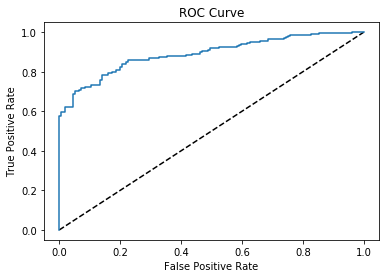

Confusion Matrix
[[121  35]
 [ 47 284]]

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       156
           1       0.89      0.86      0.87       331

    accuracy                           0.83       487
   macro avg       0.81      0.82      0.81       487
weighted avg       0.84      0.83      0.83       487

Traning score: 0.787
Test score   : 0.832
AUC          : 0.817


In [295]:
x_labels_dict = {
    "Original" : [
        'REVENUE',                      'TOTAL_MEALS_ORDERED',          'UNIQUE_MEALS_PURCH',           
        'CONTACTS_W_CUSTOMER_SERVICE',  'PRODUCT_CATEGORIES_VIEWED',    'AVG_TIME_PER_SITE_VISIT',      
        'MOBILE_NUMBER',                'CANCELLATIONS_BEFORE_NOON',    'CANCELLATIONS_AFTER_NOON',     
        'TASTES_AND_PREFERENCES',       'MOBILE_LOGINS',                'PC_LOGINS',                    
        'WEEKLY_PLAN',                  'EARLY_DELIVERIES',             'LATE_DELIVERIES',              
        'PACKAGE_LOCKER',               'REFRIGERATED_LOCKER',          'FOLLOWED_RECOMMENDATIONS_PCT', 
        'AVG_PREP_VID_TIME',            'LARGEST_ORDER_SIZE',           'MASTER_CLASSES_ATTENDED',      
        'MEDIAN_MEAL_RATING',           'AVG_CLICKS_PER_VISIT',         'TOTAL_PHOTOS_VIEWED'
    ], 
    "Full": [
        'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
        'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
        'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
        'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
        'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
        'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
        'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
        'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
        'IS_VALID_EMAIL', 'out_AVG_CLICKS_PER_VISIT', 'out_AVG_PREP_VID_TIME',
        'out_AVG_TIME_PER_SITE_VISIT', 'out_CANCELLATIONS_BEFORE_NOON',
        'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_LARGEST_ORDER_SIZE',
        'out_LATE_DELIVERIES', 'out_TOTAL_PHOTOS_VIEWED',
        'change_AVG_PREP_VID_TIME', 'change_AVG_TIME_PER_SITE_VISIT',
        'change_FOLLOWED_RECOMMENDATIONS_PCT',
        'change_CANCELLATIONS_BEFORE_NOON', 'change_TOTAL_PHOTOS_VIEWED',
        'change_LARGEST_ORDER_SIZE', 'change_CANCELLATIONS_AFTER_NOON',
        'TOTAL_CANCELATIONS', 'change_TOTAL_CANCELATIONS'
    ],
    "Significant" : [
        'REVENUE'                            , 'CONTACTS_W_CUSTOMER_SERVICE'        , 'MOBILE_NUMBER',
        'CANCELLATIONS_BEFORE_NOON'          , 'CANCELLATIONS_AFTER_NOON'           , 'MOBILE_LOGINS',
        'WEEKLY_PLAN'                        , 'EARLY_DELIVERIES'                   , 'REFRIGERATED_LOCKER',
        'FOLLOWED_RECOMMENDATIONS_PCT'       , 'MEDIAN_MEAL_RATING'                 , 'AVG_CLICKS_PER_VISIT',
        'TOTAL_PHOTOS_VIEWED'                , 'IS_VALID_EMAIL'                     , 'change_FOLLOWED_RECOMMENDATIONS_PCT',
        'change_CANCELLATIONS_BEFORE_NOON'   , 'change_AVG_PREP_VID_TIME'           , 'change_TOTAL_PHOTOS_VIEWED'         ,
        'change_LARGEST_ORDER_SIZE'
    ], 
    "Test_1" : [
        'REVENUE',                        'TOTAL_MEALS_ORDERED',                 'UNIQUE_MEALS_PURCH',           
        'CONTACTS_W_CUSTOMER_SERVICE',    'PRODUCT_CATEGORIES_VIEWED',           'AVG_TIME_PER_SITE_VISIT',      
        'MOBILE_NUMBER',                  'CANCELLATIONS_BEFORE_NOON',           'CANCELLATIONS_AFTER_NOON',     
        'TASTES_AND_PREFERENCES',         'MOBILE_LOGINS',                       'PC_LOGINS',                    
        'WEEKLY_PLAN',                    'EARLY_DELIVERIES',                    'LATE_DELIVERIES',              
        'PACKAGE_LOCKER',                 'REFRIGERATED_LOCKER',                 'FOLLOWED_RECOMMENDATIONS_PCT', 
        'AVG_PREP_VID_TIME',              'LARGEST_ORDER_SIZE',                  'MASTER_CLASSES_ATTENDED',      
        'MEDIAN_MEAL_RATING',             'AVG_CLICKS_PER_VISIT',                'TOTAL_PHOTOS_VIEWED',          
        'IS_VALID_EMAIL',                 'change_FOLLOWED_RECOMMENDATIONS_PCT', 'change_CANCELLATIONS_BEFORE_NOON',
        'change_AVG_PREP_VID_TIME',       'change_TOTAL_PHOTOS_VIEWED',          'change_LARGEST_ORDER_SIZE',
        'change_CANCELLATIONS_AFTER_NOON'
    ], 
    "Test_2" : [
        'REVENUE'                            , 'CONTACTS_W_CUSTOMER_SERVICE'        , 'MOBILE_NUMBER',
        'CANCELLATIONS_BEFORE_NOON'          , 'CANCELLATIONS_AFTER_NOON'           , 'MOBILE_LOGINS',
        'WEEKLY_PLAN'                        , 'EARLY_DELIVERIES'                   , 'REFRIGERATED_LOCKER',
        'FOLLOWED_RECOMMENDATIONS_PCT'       , 'MEDIAN_MEAL_RATING'                 , 'AVG_CLICKS_PER_VISIT',
        'TOTAL_PHOTOS_VIEWED'                , 'IS_VALID_EMAIL'                     , 'change_FOLLOWED_RECOMMENDATIONS_PCT',
        'change_CANCELLATIONS_BEFORE_NOON'   , 'change_AVG_PREP_VID_TIME'           , 'change_TOTAL_PHOTOS_VIEWED'         ,
        'change_LARGEST_ORDER_SIZE'
    ]
}

i += 1

train_score, test_score, auc = Scaled_Model_Execution(x_labels_dict["Test_2"])
save_scores(f"Significant Scaled LogisticRegression {i}", train_score, test_score, auc)

In [263]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

#Scaled_Model_Execution(x_labels_dict["Test_2"],
#                       tree = False)
#
## Traning score: 0.787
## Test score   : 0.832
## AUC          : 0.817
#
#
## INSTANTIATING a classification tree object
#full_tree = DecisionTreeClassifier()
#
#Scaled_Model_Execution(x_labels_dict["Test_2"],
#                       model = full_tree,
#                       tree = False)
## Traning score: 1.0
## Test score   : 0.725
## AUC          : 0.67
#
#
## Instantiate ada
#ada = AdaBoostClassifier(base_estimator=full_tree, n_estimators=180, random_state=SEED)
#
#Scaled_Model_Execution(x_labels_dict["Test_2"],
#                       model = ada,
#                       tree = False)
#
##Traning score: 1.0
##Test score   : 0.723
##AUC          : 0.664
#
#
## INSTANTIATING a classification tree object
#knn = KNeighborsClassifier(n_neighbors = 5)
#
#Scaled_Model_Execution(x_labels_dict["Test_2"],
#                       model = knn,
#                       tree = False)
#
##Traning score: 0.845
##Test score   : 0.77
##AUC          : 0.734
#
#
## declaring a hyperparameter space
#estimator_space  = pd.np.arange(100, 1100, 250)
#leaf_space       = pd.np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]
#
#
## creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space}
#
#
## INSTANTIATING the model object without hyperparameters
#full_forest_grid = RandomForestClassifier(random_state = 802)
#
#
## GridSearchCV object
#full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
#                              param_grid = param_grid,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                           needs_threshold = False))
#
#Scaled_Model_Execution(x_labels_dict["Test_2"],
#                       model = full_forest_cv,
#                       tree  = False)
#
## Traning score: 0.825
## Test score   : 0.755
## AUC          : 0.755



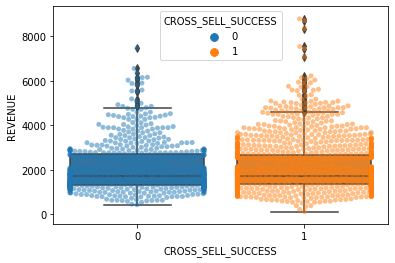

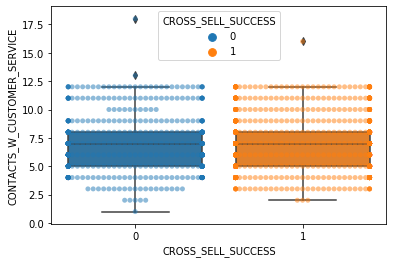

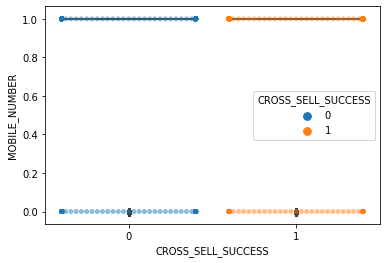

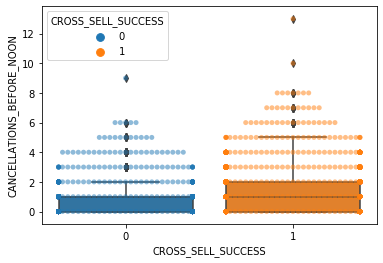

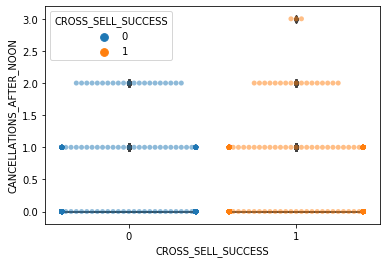

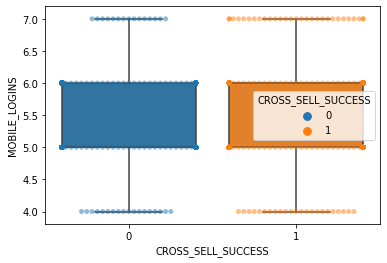

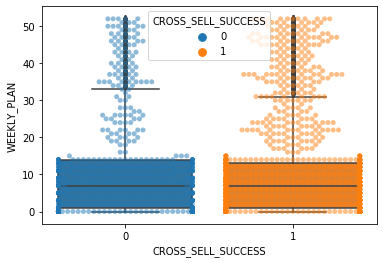

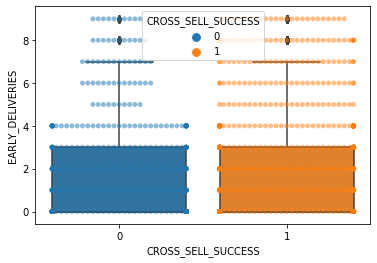

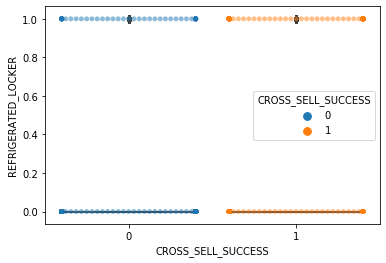

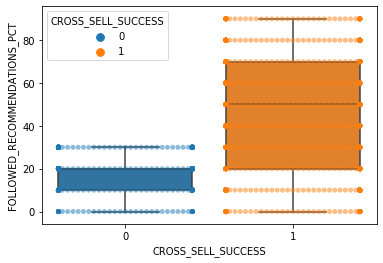

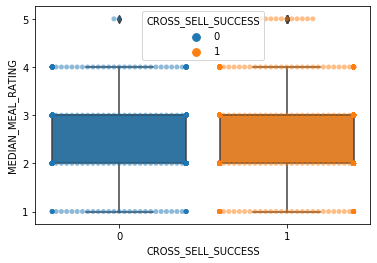

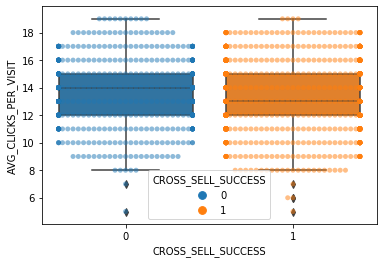

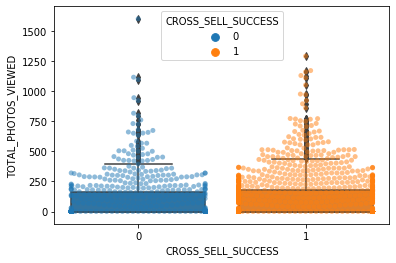

KeyboardInterrupt: 

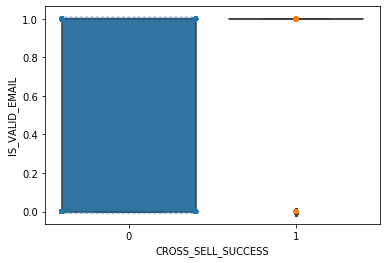

In [264]:
X_data = original_df.loc[:, x_labels_dict["Test_2"]]

target_variable = "CROSS_SELL_SUCCESS"
types = X_data.dtypes

for col in X_data:
    sns.boxplot(
        x    = target_variable,
        y    = col,
        data = original_df
    )
    sns.swarmplot(
        x      = target_variable,
        y      = col,
        hue    = target_variable,
        data   = original_df,
        alpha  = 0.5,
        orient = 'v'
    )
    #figure = sns_plot.get_figure()    
    #figure.savefig(f"{col}.png")
    plt.show()

In [51]:
original_df.corr()["CROSS_SELL_SUCCESS"].sort_values(ascending=False)

CROSS_SELL_SUCCESS                     1.000000
FOLLOWED_RECOMMENDATIONS_PCT           0.464387
IS_VALID_EMAIL                         0.280870
CANCELLATIONS_BEFORE_NOON              0.163442
MOBILE_NUMBER                          0.102657
TASTES_AND_PREFERENCES                 0.081438
POTENTIAL_YOUTH                        0.068483
REFRIGERATED_LOCKER                    0.068321
change_CANCELLATIONS_AFTER_NOON        0.045200
MOBILE_LOGINS                          0.044462
PACKAGE_LOCKER                         0.043534
MASTER_CLASSES_ATTENDED                0.037213
CONTACTS_W_CUSTOMER_SERVICE            0.036541
AVG_PREP_VID_TIME                      0.032115
MEDIAN_MEAL_RATING                     0.031798
change_TOTAL_PHOTOS_VIEWED             0.024034
LARGEST_ORDER_SIZE                     0.022000
out_AVG_TIME_PER_SITE_VISIT            0.015597
out_LARGEST_ORDER_SIZE                 0.015597
EARLY_DELIVERIES                       0.015112
AVG_TIME_PER_SITE_VISIT                0

In [52]:
print(original_df[original_df.loc[:,'CROSS_SELL_SUCCESS'] == 0].describe())

           REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  \
count   625.000000               625.0           625.000000   
mean   2099.780800                 0.0            74.113600   
std    1136.706676                 0.0            57.731681   
min     440.000000                 0.0            11.000000   
25%    1330.000000                 0.0            38.000000   
50%    1725.000000                 0.0            57.000000   
75%    2730.000000                 0.0            93.000000   
max    7473.375000                 0.0           388.000000   

       UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  \
count          625.000000                   625.000000   
mean             4.900800                     6.862400   
std              2.549462                     2.350043   
min              1.000000                     1.000000   
25%              3.000000                     5.000000   
50%              5.000000                     7.000000   
75%              7.000000 

In [53]:
print(original_df[original_df.loc[:,'CROSS_SELL_SUCCESS'] == 1].describe())

           REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  \
count  1321.000000              1321.0          1321.000000   
mean   2110.846707                 1.0            74.880394   
std    1139.452293                 0.0            54.146834   
min     131.000000                 1.0            11.000000   
25%    1368.000000                 1.0            40.000000   
50%    1750.000000                 1.0            61.000000   
75%    2660.000000                 1.0            97.000000   
max    8793.750000                 1.0           493.000000   

       UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  \
count         1321.000000                  1321.000000   
mean             4.906889                     7.040878   
std              2.480461                     2.246511   
min              1.000000                     2.000000   
25%              3.000000                     5.000000   
50%              5.000000                     7.000000   
75%              7.000000 

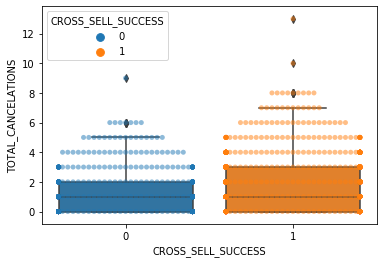

In [71]:
    sns.boxplot(
        x    = "CROSS_SELL_SUCCESS",
        y    = "TOTAL_CANCELATIONS",
        data = original_df
    )    
    sns.swarmplot(
        x      = "CROSS_SELL_SUCCESS",
        y      = "TOTAL_CANCELATIONS",
        hue    = "CROSS_SELL_SUCCESS",
        data   = original_df,
        alpha  = 0.5,
        orient = 'v'
    )
    plt.show()

In [ ]:
help(GradientBoostingClassifier)

In [ ]:
#original_df

from sklearn.ensemble import RandomForestClassifier 

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 802)

Model_Execution(x_label = x_labels_dict["Significant"],
                model   = rf_default,
                tree     = True)

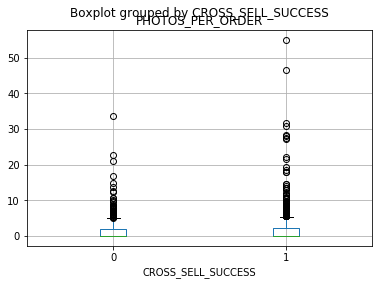

In [281]:
original_df["PHOTOS_PER_ORDER"] = original_df["TOTAL_PHOTOS_VIEWED"] / original_df["TOTAL_MEALS_ORDERED"]
original_df.boxplot("PHOTOS_PER_ORDER", by="CROSS_SELL_SUCCESS")